In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

2024-11-26 17:22:03.355969: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-26 17:22:07.778585: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-11-26 17:22:07.778716: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-11-26 17:22:07.798177: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-11-26 17:22:08.598206: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 2 compatible adapters.


In [2]:
(train_img, train_lb), (test_img, test_lb) = tf.keras.datasets.mnist.load_data()

print(train_img.shape, train_lb.shape, test_img.shape, test_lb.shape, '\n')

# set random seed
np.random.seed(42)
trainsize = 10000  # number of training images we use, selected randomly
randtrain = np.random.choice(train_img.shape[0], trainsize, replace=False)
X_train, y_train = train_img[randtrain], train_lb[randtrain]

np.random.seed(10)
testsize = 10000  # number of testing images we use, selected randomly
randtest = np.random.choice(test_img.shape[0], testsize, replace=False)
X_test, y_test = test_img[randtest], test_lb[randtest]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,) 

(10000, 28, 28) (10000,) (10000, 28, 28) (10000,)


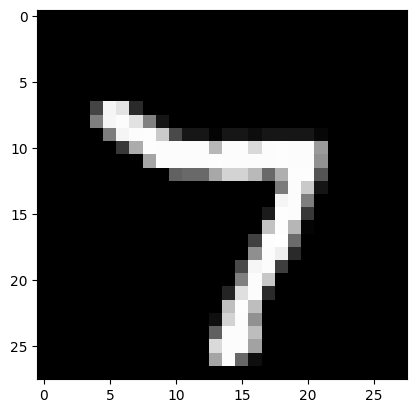

In [3]:
# demonstrate an image
plt.figure()
plt.imshow(X_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [4]:
# build the cnn model
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.Dense(10, activation='softmax'))

2024-11-26 17:22:10.086267: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-26 17:22:10.086822: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (NVIDIA T400 4GB)
2024-11-26 17:22:10.390511: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 1 (Intel(R) Iris(R) Xe Graphics)
2024-11-26 17:22:10.494657: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-26 17:22:10.494696: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Yo

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [6]:
train_images = X_train.reshape((trainsize, 28, 28, 1))
train_images = (train_images.astype('float32') - 127.5) / 127.5

test_images = X_test.reshape((testsize, 28, 28, 1))
test_images = (test_images.astype('float32') - 127.5) / 127.5

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=100, epochs=50,
                    validation_data=(test_images, test_labels))

# test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/50


2024-11-26 17:22:12.749435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 97/100 [============================>.] - ETA: 0s - loss: 1.9275 - accuracy: 0.5377

2024-11-26 17:22:28.728234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 18s 43ms/step - loss: 1.9098 - accuracy: 0.5437 - val_loss: 1.3196 - val_accuracy: 0.7662
Epoch 2/50
100/100 [==============================] - 4s 43ms/step - loss: 0.8429 - accuracy: 0.8180 - val_loss: 0.5358 - val_accuracy: 0.8599
Epoch 3/50
100/100 [==============================] - 4s 43ms/step - loss: 0.4574 - accuracy: 0.8769 - val_loss: 0.3762 - val_accuracy: 0.8971
Epoch 4/50
100/100 [==============================] - 7s 67ms/step - loss: 0.3504 - accuracy: 0.9011 - val_loss: 0.3073 - val_accuracy: 0.9118
Epoch 5/50
100/100 [==============================] - 4s 38ms/step - loss: 0.2958 - accuracy: 0.9171 - val_loss: 0.2727 - val_accuracy: 0.9240
Epoch 6/50
100/100 [==============================] - 4s 43ms/step - loss: 0.2581 - accuracy: 0.9274 - val_loss: 0.2469 - val_accuracy: 0.9315
Epoch 7/50
100/100 [==============================] - 4s 41ms/step - loss: 0.2319 - accuracy: 0.9347 - val_loss: 0.2198 - val_accuracy: 0.9367
Epoch 8/5

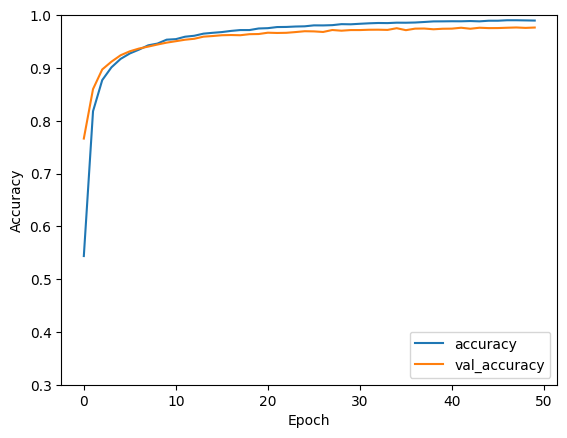

In [7]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')
plt.show()
# print('Test accuracy:', test_acc)

We can see that both training accuracy and testing are approximately 0.96 after 15 epochs.

1/1 [==============================] - 0s 89ms/step
[[4.5749150e-07 1.4948769e-05 9.9890184e-01 1.0760139e-03 2.6740920e-13
  2.3880881e-10 1.0067230e-08 5.3818444e-06 1.3089248e-06 3.3878203e-10]]
prediction: 2


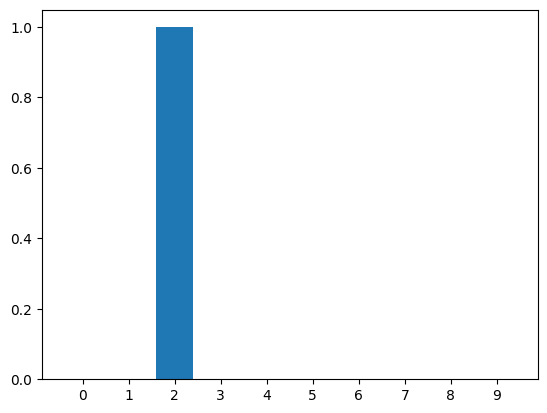

In [13]:
# demonstration: predict the ith test digit
i = 15
prediction = model.predict(test_images[i].reshape(1,28,28,1))

# get probability distribution and classification of the test digit
print(prediction)
print('prediction:', np.argmax(prediction))

# draw the barplot
plt.figure()
plt.bar(np.arange(0,10).astype('str'), prediction[0,:])
plt.show()

actual label: 2


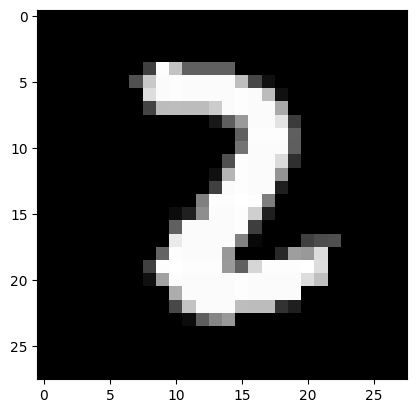

In [14]:
# show the actual ith digit
print('actual label:', np.argmax(test_labels[i]))
plt.figure()
plt.imshow(test_images[i,:,:,0], cmap='gray')
plt.show()

In [10]:
pred_labels = model.predict(test_images).argmax(axis=1)
true_labels = test_labels.argmax(axis=1)

313/313 [==============================] - 4s 14ms/step


2024-11-26 17:26:22.875509: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-26 17:26:22.875584: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-26 17:26:22.875631: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 17714 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-11-26 17:26:22.875653: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 14553 MB memory) -> physical PluggableDevice (device: 1, name: 

Create confusion matrix and generate heatmap. This part is modified from https://androidkt.com/keras-confusion-matrix-in-tensorboard/

In [15]:
confusion_mat = tf.math.confusion_matrix(labels=true_labels, predictions=pred_labels).numpy()
confusion_mat

array([[ 971,    0,    3,    0,    0,    1,    2,    1,    2,    0],
       [   1, 1130,    2,    1,    0,    0,    1,    0,    0,    0],
       [   3,    2, 1006,    0,    3,    0,    2,   11,    5,    0],
       [   1,    0,    4,  983,    0,    9,    0,    6,    3,    4],
       [   1,    0,    4,    0,  965,    0,    2,    1,    3,    6],
       [   2,    1,    2,    6,    0,  874,    3,    1,    2,    1],
       [   6,    4,    1,    0,    2,    7,  937,    0,    1,    0],
       [   2,    3,   18,    2,    2,    0,    0,  994,    1,    6],
       [   7,    0,    4,    2,    3,    2,    4,    6,  942,    4],
       [   6,    4,    0,    4,    8,    8,    0,   10,    6,  963]],
      dtype=int32)

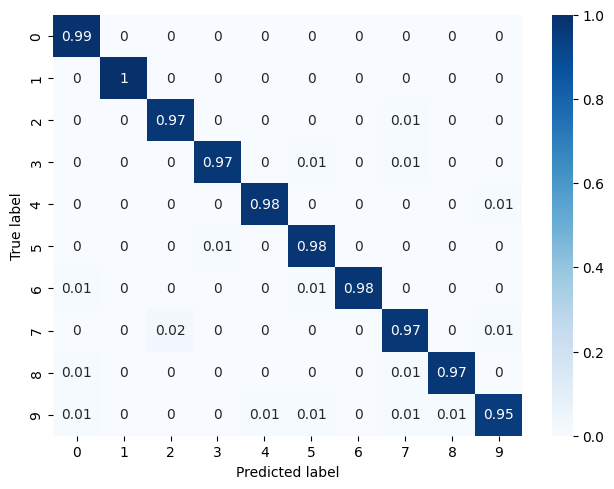

In [16]:
import pandas as pd
import seaborn as sns

# normalize
confusion_mat_norm = np.around(confusion_mat.astype('float') / np.atleast_2d(confusion_mat.sum(axis=1)).T, decimals=2)

classes = np.arange(0,10).astype('str')
confusion_mat_df = pd.DataFrame(confusion_mat_norm,
                                index = classes, 
                                columns = classes)

# generate heatmap
figure = plt.figure()
sns.heatmap(confusion_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()